In [1]:
#from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
from astropy.table import Table
from modules.Utils.kpf_parse import get_datecode
from kpfpipe.models.level0 import KPF0
%matplotlib inline

In [2]:
ObsID = 'KP.20241016.55598.79'
L0_file = ObsID + '.fits'
D2_file = ObsID + '_2D.fits'
L0 = KPF0.from_fits(L0_file, data_type='KPF')
L0.info()

File name: KP.20241016.55598.79.fits
|Header Name          |# Cards              
|PRIMARY              |                 439 
|RECEIPT              |                   0 
|CONFIG               |                   0 
|GREEN_AMP1           |                  11 
|GREEN_AMP2           |                  11 
|GREEN_CCD            |                   3 
|GREEN_VAR            |                   3 
|RED_AMP1             |                  13 
|RED_AMP2             |                  13 
|RED_CCD              |                   0 
|RED_VAR              |                   0 
|CA_HK                |                  58 
|EXPMETER_SCI         |                 849 
|EXPMETER_SKY         |                 849 
|GUIDECAM             |                   0 
|TELEMETRY            |                  26 
|SOLAR_IRRADIANCE     |                   0 
|GUIDER_CUBE_ORIGINS  |                  87 
|GUIDER_AVG           |                   8 

|Extension Name       |Data Type            |Data Dimension   

In [3]:
L0.header['PRIMARY']

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
FAVER   = '1.5     '           / Written by FITSAssemble version 1.5            
TIMESYS = 'UTC     '                                                            
CAMERAS =                    5 / Detectors in assembly request                  
GREEN   = 'YES     '           / Was this camera found?                         
RED     = 'YES     '           / Was this camera found?                         
CA_HK   = 'YES     '           / Was this camera found?                         
EXPMETER= 'YES     '           / Was this camera found?                         
GUIDE   = 'YES     '           / Was this camera found?                         
STARTIME= '2024-10-16T15:26:

In [4]:
starname = L0.header['PRIMARY']['TARGNAME']
Texp = L0.header['PRIMARY']['GRELAPS'] # actually, this is the green CCD exposure time
print('Star = ' + starname)
print('Exposure time = ' + str(Texp) + ' sec')

Star = IRAS 04125+2902
Exposure time = 1200.013 sec


<Figure size 432x288 with 0 Axes>

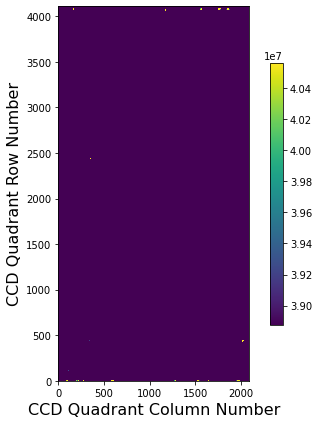

In [5]:
plt.figure(tight_layout=True)
plt.figure(figsize=(6, 6), tight_layout=True)
plt.imshow(L0['GREEN_AMP2'].data, cmap='viridis', origin='lower',
           vmin=np.percentile(L0['GREEN_AMP1'].data,0.1),
           vmax=np.percentile(L0['GREEN_AMP1'].data,99))
plt.xlabel('CCD Quadrant Column Number', fontsize=16)
plt.ylabel('CCD Quadrant Row Number', fontsize=16)
plt.colorbar(shrink=0.7)
plt.grid(False)
plt.show()

<Figure size 432x288 with 0 Axes>

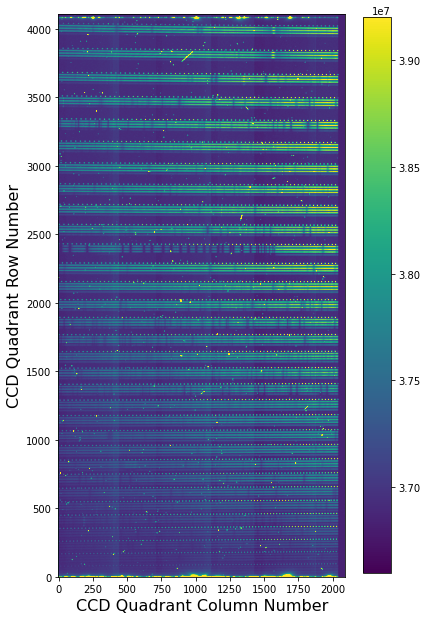

In [6]:
plt.figure(tight_layout=True)
plt.figure(figsize=(6, 12), tight_layout=True)
plt.imshow(L0['RED_AMP1'].data, cmap='viridis', origin='lower',
           vmin=np.percentile(L0['RED_AMP1'].data,0.1),
           vmax=np.percentile(L0['RED_AMP1'].data,99))
plt.xlabel('CCD Quadrant Column Number', fontsize=16)
plt.ylabel('CCD Quadrant Row Number', fontsize=16)
plt.colorbar(shrink=0.66)
plt.grid(False)
plt.show()

In [7]:
D2 = KPF0.from_fits(D2_file, data_type='KPF')
D2.info()

File name: KP.20241016.55598.79_2D.fits
|Header Name          |# Cards              
|PRIMARY              |                 544 
|RECEIPT              |                   0 
|CONFIG               |                   0 
|GREEN_AMP1           |                  18 
|GREEN_AMP2           |                  18 
|GREEN_CCD            |                   3 
|GREEN_VAR            |                   3 
|RED_AMP1             |                  18 
|RED_AMP2             |                  18 
|RED_CCD              |                   0 
|RED_VAR              |                   0 
|CA_HK                |                  16 
|EXPMETER_SCI         |                   0 
|EXPMETER_SKY         |                   0 
|GUIDECAM             |                   0 
|TELEMETRY            |                   0 
|SOLAR_IRRADIANCE     |                   0 

|Extension Name       |Data Type            |Data Dimension       
|RECEIPT              |table                |1                   
|CONFIG         

In [10]:
# fig, axs = plt.subplots(1, 2, figsize=(16,10), tight_layout=True)
# im1 = axs[0].imshow(D2['GREEN_CCD'].data, cmap='viridis', origin='lower', vmin=0, vmax=np.percentile(D2['GREEN_CCD'].data,99))
# axs[0].set_title('Green CCD', fontsize=16)
# axs[0].set_xlabel('CCD Column Number', fontsize=16)
# axs[0].set_ylabel('CCD Row Number', fontsize=16)
# fig.colorbar(im1, ax=axs[0], shrink=0.6)
# im2 = axs[1].imshow(D2['RED_CCD'].data, cmap='viridis', origin='lower', vmin=0, vmax=np.percentile(D2['RED_CCD'].data,99))
# axs[1].set_title('Red CCD', fontsize=16)
# axs[1].set_xlabel('CCD Column Number', fontsize=16)
# axs[1].set_ylabel('CCD Row Number', fontsize=16)
# fig.colorbar(im2, ax=axs[1], shrink=0.6)
# axs[0].grid(False)
# axs[1].grid(False)
# plt.subplots_adjust(wspace=0.4)
# plt.show()

In [11]:
df_SCI_EM = L0['EXPMETER_SCI']
df_SCI_EM

,Date-Beg,Date-End,Date-Beg-Corr,Date-End-Corr,872.5,869.1,865.8,862.4,859.2,855.9,...,447.8,447.4,447.1,446.8,446.4,446.1,445.8,445.4,445.1,444.8
0,2024-10-16T15:26:38.361,2024-10-16T15:26:46.497,2024-10-16T15:26:38.790,2024-10-16T15:26:46.497,374.119458,310.599458,399.799458,366.119458,354.539458,430.939458,...,53.379458,130.919458,15.539458,29.219458,-26.620542,19.739458,40.119458,28.259458,166.979458,52.979458
1,2024-10-16T15:26:47.323,2024-10-16T15:26:55.459,2024-10-16T15:26:47.323,2024-10-16T15:26:55.459,466.262315,361.742315,512.942315,437.262315,442.682315,454.082315,...,69.522315,76.062315,29.682315,-23.637685,141.522315,42.882315,62.262315,163.402315,54.122315,-5.877685
2,2024-10-16T15:26:56.278,2024-10-16T15:27:04.421,2024-10-16T15:26:56.278,2024-10-16T15:27:04.421,393.483990,431.963990,420.163990,473.483990,455.903990,400.303990,...,84.743990,47.283990,183.903990,36.583990,135.743990,71.103990,-19.516010,44.623990,140.343990,116.343990
3,2024-10-16T15:27:05.227,2024-10-16T15:27:13.362,2024-10-16T15:27:05.227,2024-10-16T15:27:13.362,310.597291,318.077291,383.277291,268.597291,373.017291,317.417291,...,98.857291,-9.602709,36.017291,71.697291,24.857291,48.217291,12.597291,67.737291,142.457291,13.457291
4,2024-10-16T15:27:14.180,2024-10-16T15:27:22.317,2024-10-16T15:27:14.180,2024-10-16T15:27:22.317,466.794335,341.274335,426.474335,299.794335,269.214335,317.614335,...,132.054335,21.594335,25.214335,10.894335,48.054335,-16.585665,6.794335,23.934335,138.654335,72.654335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,2024-10-16T15:46:02.226,2024-10-16T15:46:10.368,2024-10-16T15:46:02.226,2024-10-16T15:46:10.368,471.779557,576.259557,534.459557,594.779557,560.199557,509.599557,...,27.039557,78.579557,84.199557,-39.120443,-61.960443,49.399557,100.779557,119.919557,135.639557,40.639557
131,2024-10-16T15:46:11.176,2024-10-16T15:46:19.313,2024-10-16T15:46:11.176,2024-10-16T15:46:19.313,491.222906,520.702906,467.902906,526.222906,541.642906,508.042906,...,9.482906,133.022906,80.642906,101.322906,88.482906,81.842906,42.222906,77.362906,100.082906,90.082906
132,2024-10-16T15:46:20.121,2024-10-16T15:46:28.263,2024-10-16T15:46:20.121,2024-10-16T15:46:28.263,517.498768,427.978768,526.178768,571.498768,548.918768,520.318768,...,1.758768,11.298768,62.918768,23.598768,12.758768,-2.881232,1.498768,-32.361232,-21.641232,69.358768
133,2024-10-16T15:46:29.077,2024-10-16T15:46:37.210,2024-10-16T15:46:29.077,2024-10-16T15:46:37.210,472.449507,482.929507,443.129507,546.449507,592.869507,621.269507,...,135.709507,133.249507,151.869507,91.549507,66.709507,33.069507,40.449507,123.589507,178.309507,50.309507


In [12]:
# Gain of CCD in KPF Exposure Meter
EM_gain = 1.48424 # e-/ADU

# Define wavelength arrays and disperion at each wavelength (nm per pixel)
wav_SCI_str = df_SCI_EM.columns[4:]               # string (center) wavelengths of each pixel
wav_SCI     = df_SCI_EM.columns[4:].astype(float) # float  (center) wavelengths of each pixel
disp_SCI        = wav_SCI*0+np.gradient(wav_SCI,1)*-1
disp_SCI_smooth = np.polyval(np.polyfit(wav_SCI,disp_SCI, deg=6),wav_SCI)

# define normalized flux array (e- / nm / time)
df_SCI_EM_norm = df_SCI_EM[wav_SCI_str] * EM_gain / disp_SCI_smooth

# define time arrays
date_beg = np.array(df_SCI_EM["Date-Beg-Corr"], dtype=np.datetime64)
date_end = np.array(df_SCI_EM["Date-End-Corr"], dtype=np.datetime64)
tdur_sec = (date_end-date_beg).astype(float)/1000. # array exposure durations in sec
time     = (date_beg-date_beg[0])/1000 # array of times since beginning in sec

# define indices for wavelength
ind_550m    = np.where((wav_SCI <  550))
ind_550_650 = np.where((wav_SCI >= 550) & (wav_SCI < 650))
ind_650_750 = np.where((wav_SCI >= 650) & (wav_SCI < 750))
ind_750p    = np.where((wav_SCI >= 750))



# define flux arrays
int_SCI_spec         = df_SCI_EM_norm[1:-1].sum(axis=0) / np.sum(tdur_sec[1:-1]) # flux vs. wavelength per sec (use first five samples)
int_SCI_flux         = df_SCI_EM.sum(axis=1)                                     # flux (ADU) vs. time (per sample)
int_SCI_flux_550m    = df_SCI_EM[wav_SCI_str[np.where((wav_SCI <  550))]].sum(axis=1)
int_SCI_flux_550_650 = df_SCI_EM[wav_SCI_str[np.where((wav_SCI >= 550) & (wav_SCI < 650))]].sum(axis=1)
int_SCI_flux_650_750 = df_SCI_EM[wav_SCI_str[np.where((wav_SCI >= 650) & (wav_SCI < 750))]].sum(axis=1)
int_SCI_flux_750p    = df_SCI_EM[wav_SCI_str[np.where((wav_SCI >= 750))]].sum(axis=1)

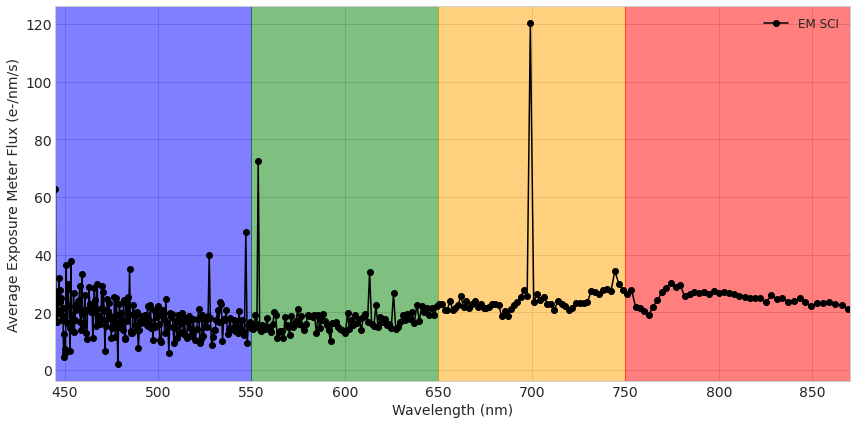

In [13]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 6), tight_layout=True)
plt.axvspan(440, 550, alpha=0.5, color='b')
plt.axvspan(550, 650, alpha=0.5, color='g')
plt.axvspan(650, 750, alpha=0.5, color='orange')
plt.axvspan(750, 880, alpha=0.5, color='red')
plt.plot(wav_SCI, int_SCI_spec, marker='o', color='k')
plt.xlabel("Wavelength (nm)", fontsize=14)
plt.ylabel("Average Exposure Meter Flux (e-/nm/s)", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(445,870)
plt.legend(["EM SCI"], fontsize=12, loc='best')
plt.show()
#plt.savefig('expmeter_flux_vs_wavelength.png',dpi=144)

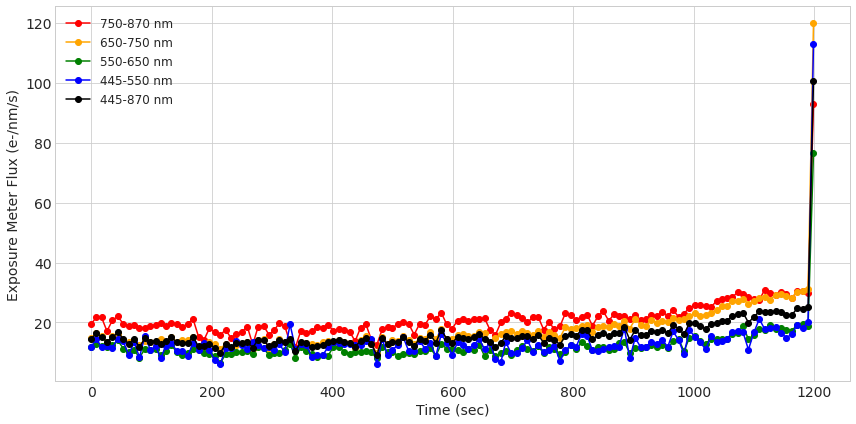

In [15]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 6), tight_layout=True)
plt.plot(time, int_SCI_flux_750p    / ((847+4.8/2)-750)           / tdur_sec, marker='o', color='r')
plt.plot(time, int_SCI_flux_650_750 / (750-650)                   / tdur_sec, marker='o', color='orange')
plt.plot(time, int_SCI_flux_550_650 / (650-550)                   / tdur_sec, marker='o', color='g')
plt.plot(time, int_SCI_flux_550m    / (550-(450.1-0.4/2))         / tdur_sec, marker='o', color='b')
plt.plot(time, int_SCI_flux         / ((847+4.8/2)-(450.1-0.4/2)) / tdur_sec, marker='o', color='k')
plt.xlabel("Time (sec)", fontsize=14)
plt.ylabel("Exposure Meter Flux (e-/nm/s)", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(["750-870 nm","650-750 nm","550-650 nm","445-550 nm","445-870 nm",], fontsize=12, loc='best')
plt.show()

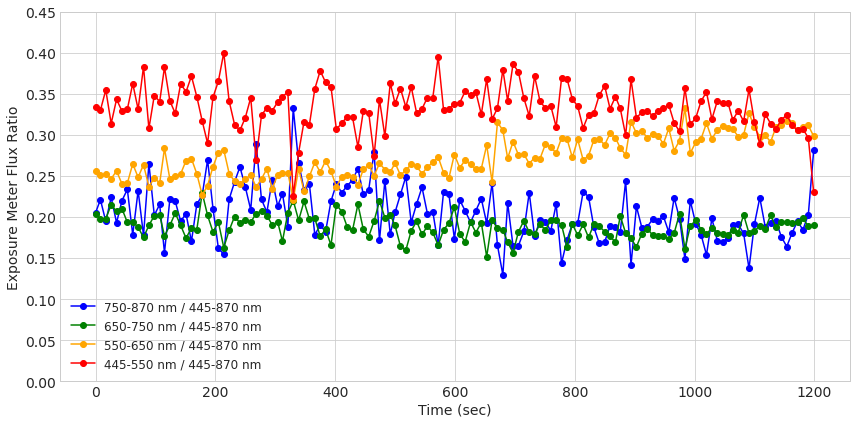

In [16]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 6), tight_layout=True)
plt.plot(time, (int_SCI_flux_550m    / int_SCI_flux ) , marker='o', color='b')
plt.plot(time, (int_SCI_flux_550_650 / int_SCI_flux ) , marker='o', color='g')
plt.plot(time, (int_SCI_flux_650_750 / int_SCI_flux ) , marker='o', color='orange')
plt.plot(time, (int_SCI_flux_750p    / int_SCI_flux ) , marker='o', color='r')
plt.xlabel("Time (sec)", fontsize=14)
plt.ylabel("Exposure Meter Flux Ratio", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,0.45)
plt.legend(["750-870 nm / 445-870 nm",
            "650-750 nm / 445-870 nm",
            "550-650 nm / 445-870 nm",
            "445-550 nm / 445-870 nm"],
           fontsize=12, loc='best')
plt.show()
#plt.savefig('EM_flux_ratio_51peg.png')